In [1]:
from extract_cell_data import *
import napari
import matplotlib.pyplot as plt

In [4]:
save_dir = "G:/Data/IBIN_Nina/workspace/cnn_model/data/"
save_plot_dir = "G:/Data/IBIN_Nina/workspace/cnn_model/data_plots_2/"

channel = 'exc561_filter605'
data_dir = "G:/Data/IBIN_Nina/temp/20230331_drug_plate3/main/"
run_dirs = search_for_runs(data_dir)
mask_dir = "G:/Data/IBIN_Nina/workspace/trained_masks_drugplate3/all_runs_vols_cellpose_reslice_150epoch"
# mask_run_dirs = glob(f'{mask_dir}/run_*')
mask_run_dirs = search_for_mask_runs(mask_dir)  # gets the order right
run_sub_dirs = [os.path.basename(run_dir) for run_dir in mask_run_dirs]
mask_field_files = glob(f'{mask_run_dirs[0]}/field*')  # assumes same fields in every run folder!
run_nums = [int(re.findall('run_([0-9]+)', s)[0]) for s in run_sub_dirs]
field_nums = [int(re.findall('field([0-9]+)*', s)[0]) for s in mask_field_files]
mask_field_files

all_fields = False
all_runs = False

runs_to_include = [1] # [1, 5, 11]
fields_to_include = [2] # [1, 2, 150, 147]

if all_fields:
    fields_to_include = field_nums

if all_runs:
    runs_to_include = run_nums

searching G:/Data/IBIN_Nina/temp/20230331_drug_plate3/main//*/*/cst*/run_*
12 run dirs found in data:
G:/Data/IBIN_Nina/temp/20230331_drug_plate3/main\23-03-31\18-19-41\cst4\run_0001
G:/Data/IBIN_Nina/temp/20230331_drug_plate3/main\23-04-01\01-09-37\cst4\run_0001
G:/Data/IBIN_Nina/temp/20230331_drug_plate3/main\23-04-01\01-09-37\cst4\run_0002
G:/Data/IBIN_Nina/temp/20230331_drug_plate3/main\23-04-01\01-09-37\cst4\run_0003
G:/Data/IBIN_Nina/temp/20230331_drug_plate3/main\23-04-01\01-09-37\cst4\run_0004
G:/Data/IBIN_Nina/temp/20230331_drug_plate3/main\23-04-01\01-09-37\cst4\run_0005
G:/Data/IBIN_Nina/temp/20230331_drug_plate3/main\23-04-01\01-09-37\cst4\run_0006
G:/Data/IBIN_Nina/temp/20230331_drug_plate3/main\23-04-01\01-09-37\cst4\run_0007
G:/Data/IBIN_Nina/temp/20230331_drug_plate3/main\23-04-01\01-09-37\cst4\run_0008
G:/Data/IBIN_Nina/temp/20230331_drug_plate3/main\23-04-03\17-48-10\cst4\run_0001
G:/Data/IBIN_Nina/temp/20230331_drug_plate3/main\23-04-03\17-48-10\cst4\run_0002
G:/Data

Extracting cells for runs [1] and fields [2]
['G:/Data/IBIN_Nina/workspace/trained_masks_drugplate3/all_runs_vols_cellpose_reslice_150epoch\\run_1', 'G:/Data/IBIN_Nina/workspace/trained_masks_drugplate3/all_runs_vols_cellpose_reslice_150epoch\\run_2', 'G:/Data/IBIN_Nina/workspace/trained_masks_drugplate3/all_runs_vols_cellpose_reslice_150epoch\\run_3', 'G:/Data/IBIN_Nina/workspace/trained_masks_drugplate3/all_runs_vols_cellpose_reslice_150epoch\\run_4', 'G:/Data/IBIN_Nina/workspace/trained_masks_drugplate3/all_runs_vols_cellpose_reslice_150epoch\\run_5', 'G:/Data/IBIN_Nina/workspace/trained_masks_drugplate3/all_runs_vols_cellpose_reslice_150epoch\\run_6', 'G:/Data/IBIN_Nina/workspace/trained_masks_drugplate3/all_runs_vols_cellpose_reslice_150epoch\\run_7', 'G:/Data/IBIN_Nina/workspace/trained_masks_drugplate3/all_runs_vols_cellpose_reslice_150epoch\\run_8', 'G:/Data/IBIN_Nina/workspace/trained_masks_drugplate3/all_runs_vols_cellpose_reslice_150epoch\\run_9', 'G:/Data/IBIN_Nina/workspac

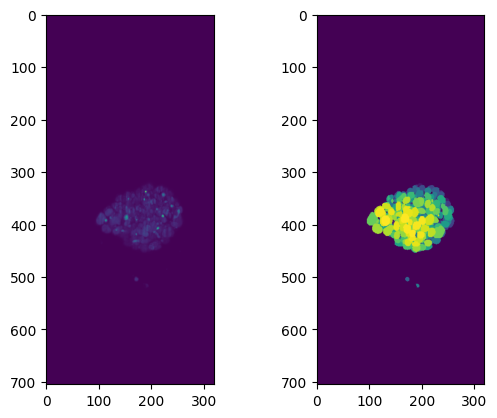

bg computed to be: 98
336 segments
saving roi tiff stacks in G:/Data/IBIN_Nina/workspace/cnn_model/data/run_0001_field_0002
saving plots in G:/Data/IBIN_Nina/workspace/cnn_model/data_plots_2/run_0001_field_0002


In [5]:

print(f"Extracting cells for runs {runs_to_include} and fields {fields_to_include}")
print(mask_run_dirs)
for n in runs_to_include:
    data_run_dir = run_dirs[n-1]
    mask_run_dir = mask_run_dirs[n-1]
    for f in fields_to_include:
        mask_file = os.path.join(mask_run_dir, os.path.basename(mask_field_files[f-1]))
        data_file = os.path.join(data_run_dir, f'field_{f:04d}', channel, '*.tif')
        print("loading", mask_file, "and", data_file)
        mask = tiff.imread(mask_file)
        data = tiff.imread(data_file)
        # viewer=napari.Viewer(show=True)
        # viewer.window._qt_window.show()  # Force window show
        # viewer.add_image(data)
        fig = plt.figure()
        ax = fig.add_subplot(1,2,1)
        ax.imshow(np.max(data, 0))
        ax2 = fig.add_subplot(1,2,2)
        ax2.imshow(np.max(mask, 0))
        plt.show()
        # viewer, image_layer = napari.imshow(data)
        
        # viewer.add_image(data)

        mask_rois, data_rois, data_rois_masked = get_rois_fixed_roi(mask, data, (32, 32, 32), bg=98)
        save_path = os.path.join(save_dir, f'run_{n:04d}_field_{f:04d}')
        save_path_dir = os.path.join(save_plot_dir, f'run_{n:04d}_field_{f:04d}')
        save_rois(save_path, mask_rois, data_rois, data_rois_masked)
        save_plots(save_path_dir, mask_rois, data_rois, data_rois_masked)

# napari.run()  # Starts the Qt event loop (blocks here)